In [26]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.svm import SVC

names = ["Linear SVM", "RBF SVM", "Poly SVM", "Sigmoid SVM"]

classifiers = [
    SVC(kernel="linear",  C=0.025),
    SVC(kernel='rbf',     gamma=2, C=1),
    SVC(kernel="poly",    C=0.025),
    SVC(kernel="sigmoid", gamma=2)]


h = .02  # step size in the mesh


In [49]:

X_semi_circle, y_semi_circle = make_moons(n_samples=80, noise=0.1, random_state=1)


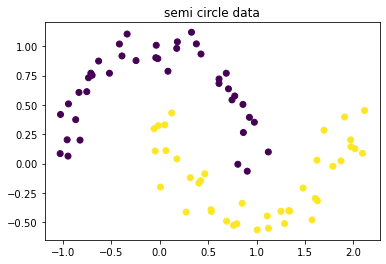

In [50]:
plt.scatter(X_semi_circle[:, 0], X_semi_circle[:, 1], c=y_semi_circle)
plt.title('semi circle data');

In [51]:
#X = StandardScaler().fit_transform(X_semi_circle)
X_train, X_test, y_train, y_test = train_test_split(X_semi_circle, y_semi_circle, test_size=.4)


<ipython-input-107-b2d1cdafc9d5>:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(1, len(classifiers) + 1, i)
<ipython-input-107-b2d1cdafc9d5>:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(1, len(classifiers) + 1, i)
<ipython-input-107-b2d1cdafc9d5>:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a futur

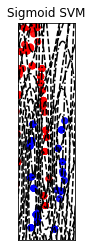

In [107]:
x_min, x_max = X_semi_circle[:, 0].min() - .5, X_semi_circle[:, 0].max() + .5
y_min, y_max = X_semi_circle[:, 1].min() - .5, X_semi_circle[:, 1].max() + .5
    
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

cm_bright = ListedColormap(['#FF0000', '#0000FF'])
#ax = plt.subplot(1, len(classifiers) + 1, 1)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=90, cmap=cm_bright)
    
    # Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=90, cmap=cm_bright)
    
    # and testing points
plt.scatter(X_test[:, 0],  X_test[:, 1],  c=y_test,  s=90, cmap=cm_bright, alpha=0.1)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
# plt.set_xticks(())
# plt.set_yticks(())

i=1
i += 1

    # iterate over classifiers
for name, clf in zip(names, classifiers):
    ax = plt.subplot(1, len(classifiers) + 1, i)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
#     if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
#     else:
#         Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
    Z = Z.reshape(xx.shape)
        
    plt.pcolormesh(xx, yy, Z > 0, cmap=plt.cm.Paired, shading='auto')
    
    plt.contour(xx, 
                    yy, 
                    Z, 
                    colors=['k', 'k', 'k'], 
                    linestyles=['--', '-.', '--'],
                    #levels=[-.5, 0, .5]
                   )
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        
        # and testing points
    ax.scatter(X_test[:, 0],  X_test[:, 1],  c=y_test,  cmap=cm_bright, alpha=0.4)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(name)
        

In [120]:
semi_circle_moons = (X_semi_circle, y_semi_circle)
datasets = [semi_circle_moons]
h = .01


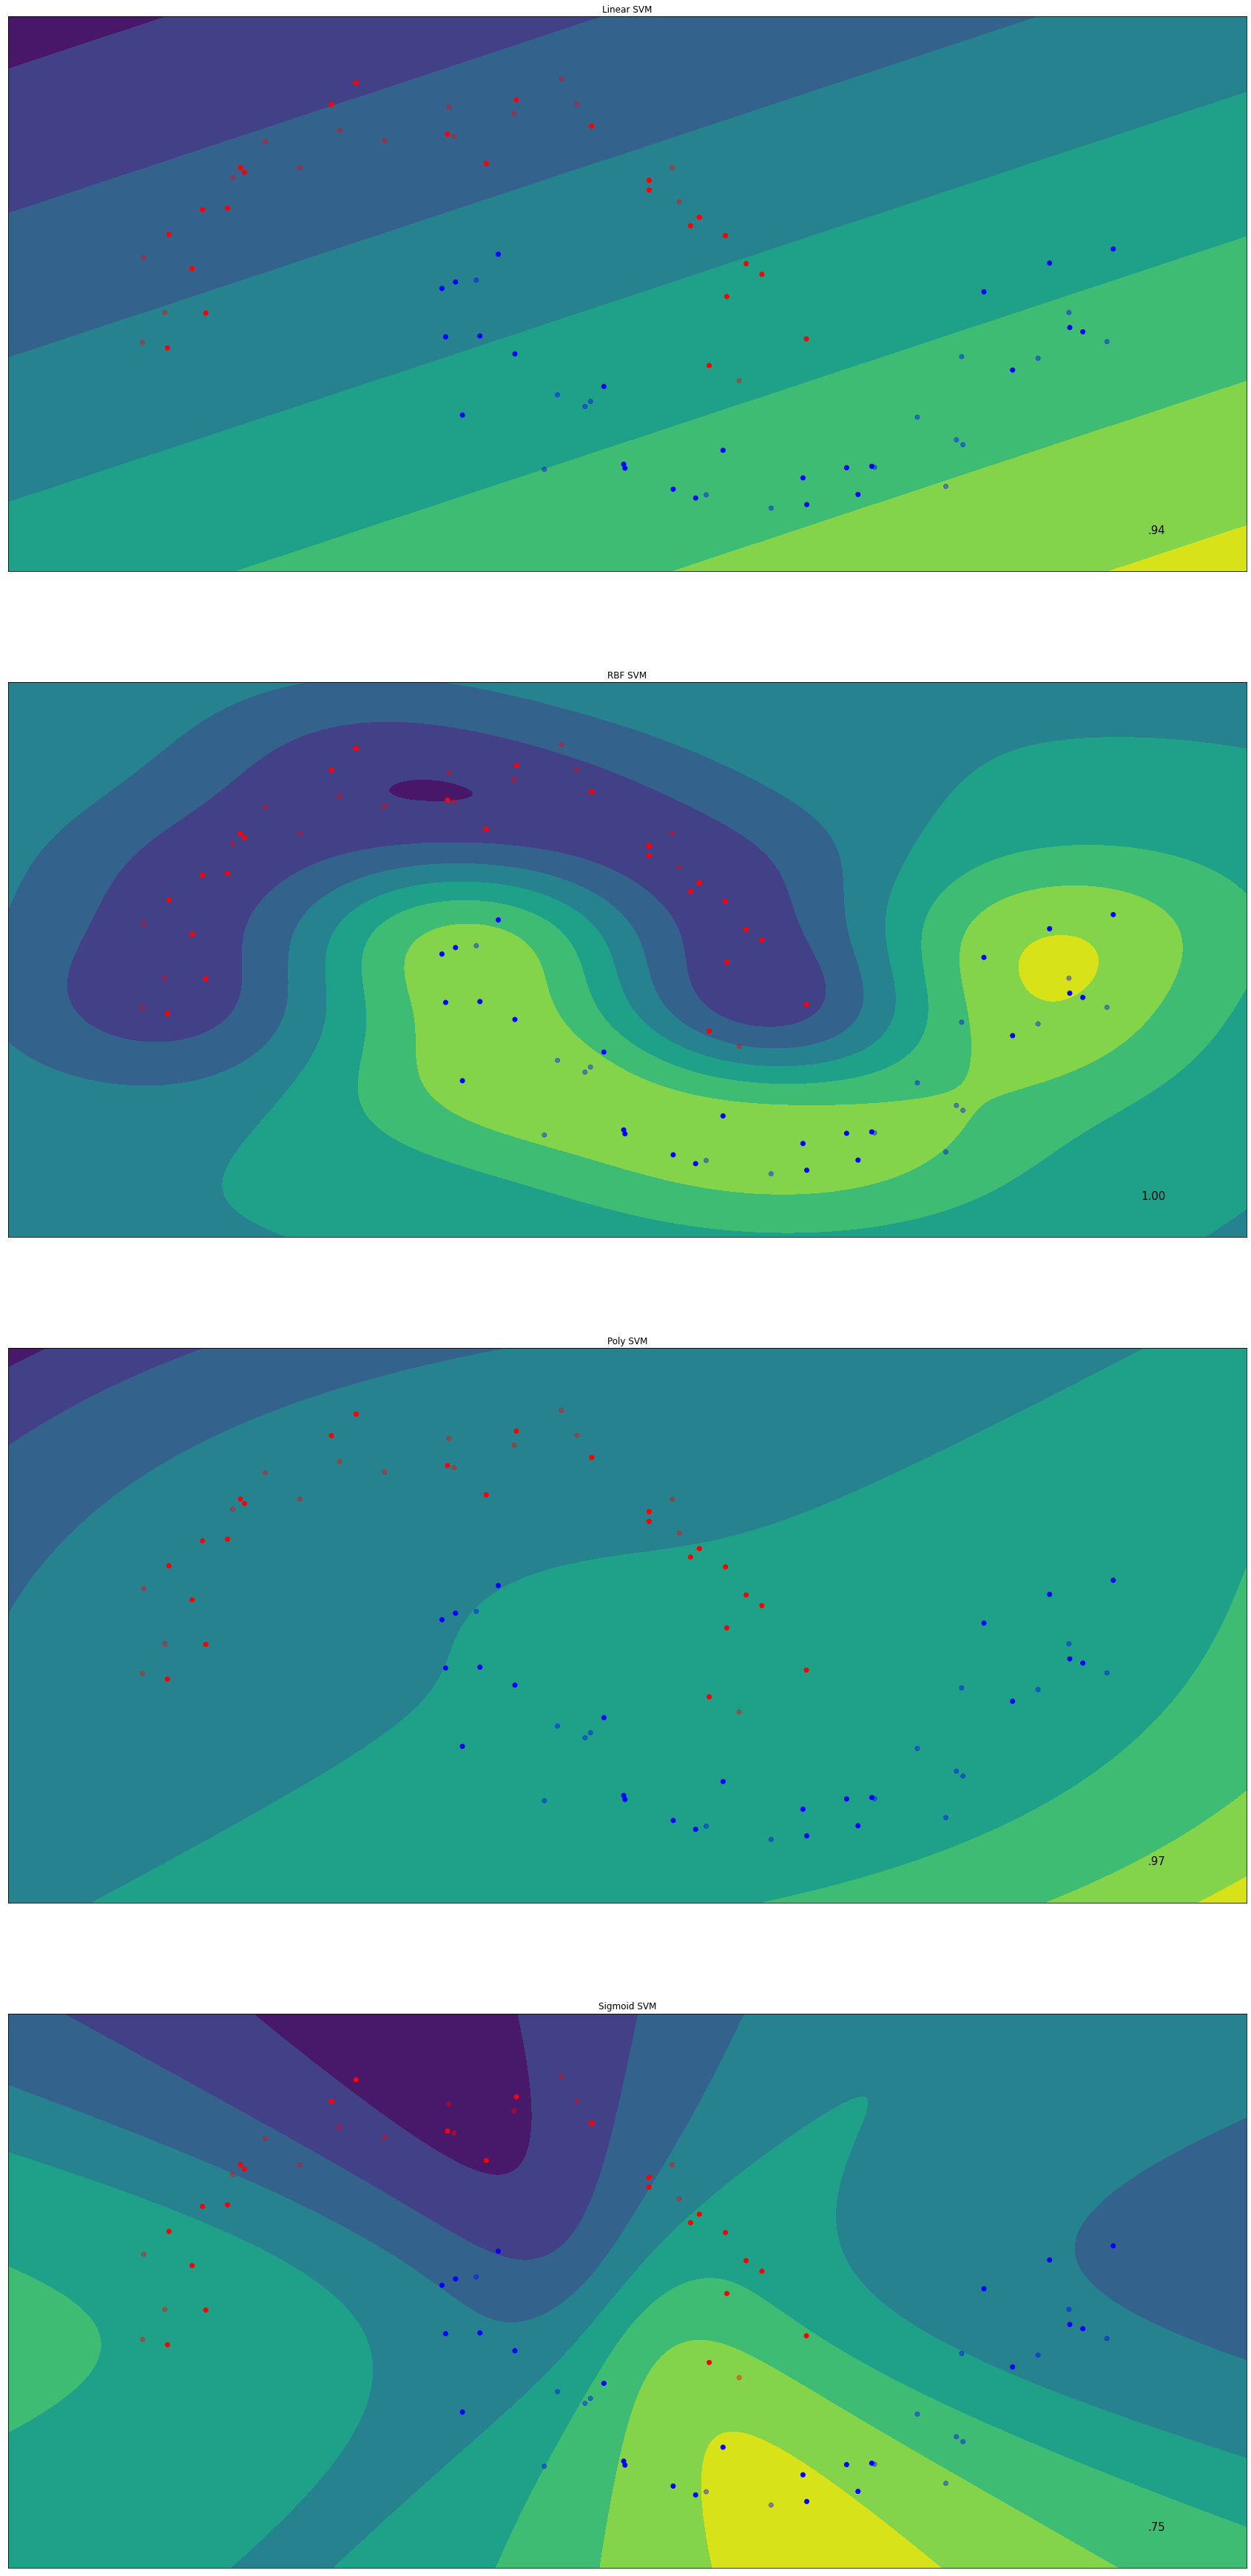

In [122]:
semi_circle_moons = (X_semi_circle, y_semi_circle)
datasets = [semi_circle_moons]
h = .01

classifiers = [
    
    SVC(kernel="linear",  C=0.025),
    SVC(kernel='rbf',     gamma=2, C=1),
    SVC(kernel="poly",    C=0.025),
    SVC(kernel="sigmoid", gamma=2)]


figure = plt.figure(figsize=(30, 80))
i = 1

# iterate over datasets
for ds in datasets:
    # preprocess dataset, split into training and test part
    X, y = ds
    
    X = StandardScaler().fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
#     cm        = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=90, cmap=cm_bright)
    
    # and testing points
    ax.scatter(X_test[:, 0],  X_test[:, 1],  c=y_test,  s=90, cmap=cm_bright, alpha=0.3)
    
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        
        ax = plt.subplot( len(classifiers) + 1,len(datasets), i)
        
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, m_max]x[y_min, y_max].
        
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        
        
#         if hasattr(clf, "decision_function"):
#             Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
#         else:
#             Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        
        #plt.pcolormesh(xx, yy, Z > 0, cmap=plt.cm.Paired, shading='auto')
    
        plt.contourf(xx, 
                    yy, 
                    Z
#                     colors=['k', 'k', 'k'], 
#                     linestyles=['--', '-.', '--'],
                    #levels=[-.5, 0, .5]
                   )
        
        #ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        
        # and testing points
        ax.scatter(X_test[:, 0],  X_test[:, 1],  c=y_test,  cmap=cm_bright, alpha=0.4)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1


(array([[-2.24410096, -2.23410096, -2.22410096, ...,  2.33589904,
          2.34589904,  2.35589904],
        [-2.24410096, -2.23410096, -2.22410096, ...,  2.33589904,
          2.34589904,  2.35589904],
        [-2.24410096, -2.23410096, -2.22410096, ...,  2.33589904,
          2.34589904,  2.35589904],
        ...,
        [-2.24410096, -2.23410096, -2.22410096, ...,  2.33589904,
          2.34589904,  2.35589904],
        [-2.24410096, -2.23410096, -2.22410096, ...,  2.33589904,
          2.34589904,  2.35589904],
        [-2.24410096, -2.23410096, -2.22410096, ...,  2.33589904,
          2.34589904,  2.35589904]]),
 array([[-2.1481526, -2.1481526, -2.1481526, ..., -2.1481526, -2.1481526,
         -2.1481526],
        [-2.1381526, -2.1381526, -2.1381526, ..., -2.1381526, -2.1381526,
         -2.1381526],
        [-2.1281526, -2.1281526, -2.1281526, ..., -2.1281526, -2.1281526,
         -2.1281526],
        ...,
        [ 2.2318474,  2.2318474,  2.2318474, ...,  2.2318474,  2.2318474

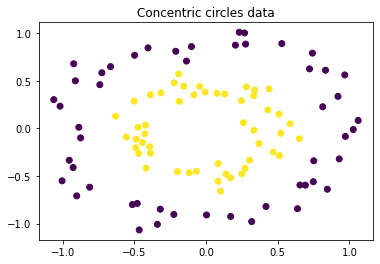

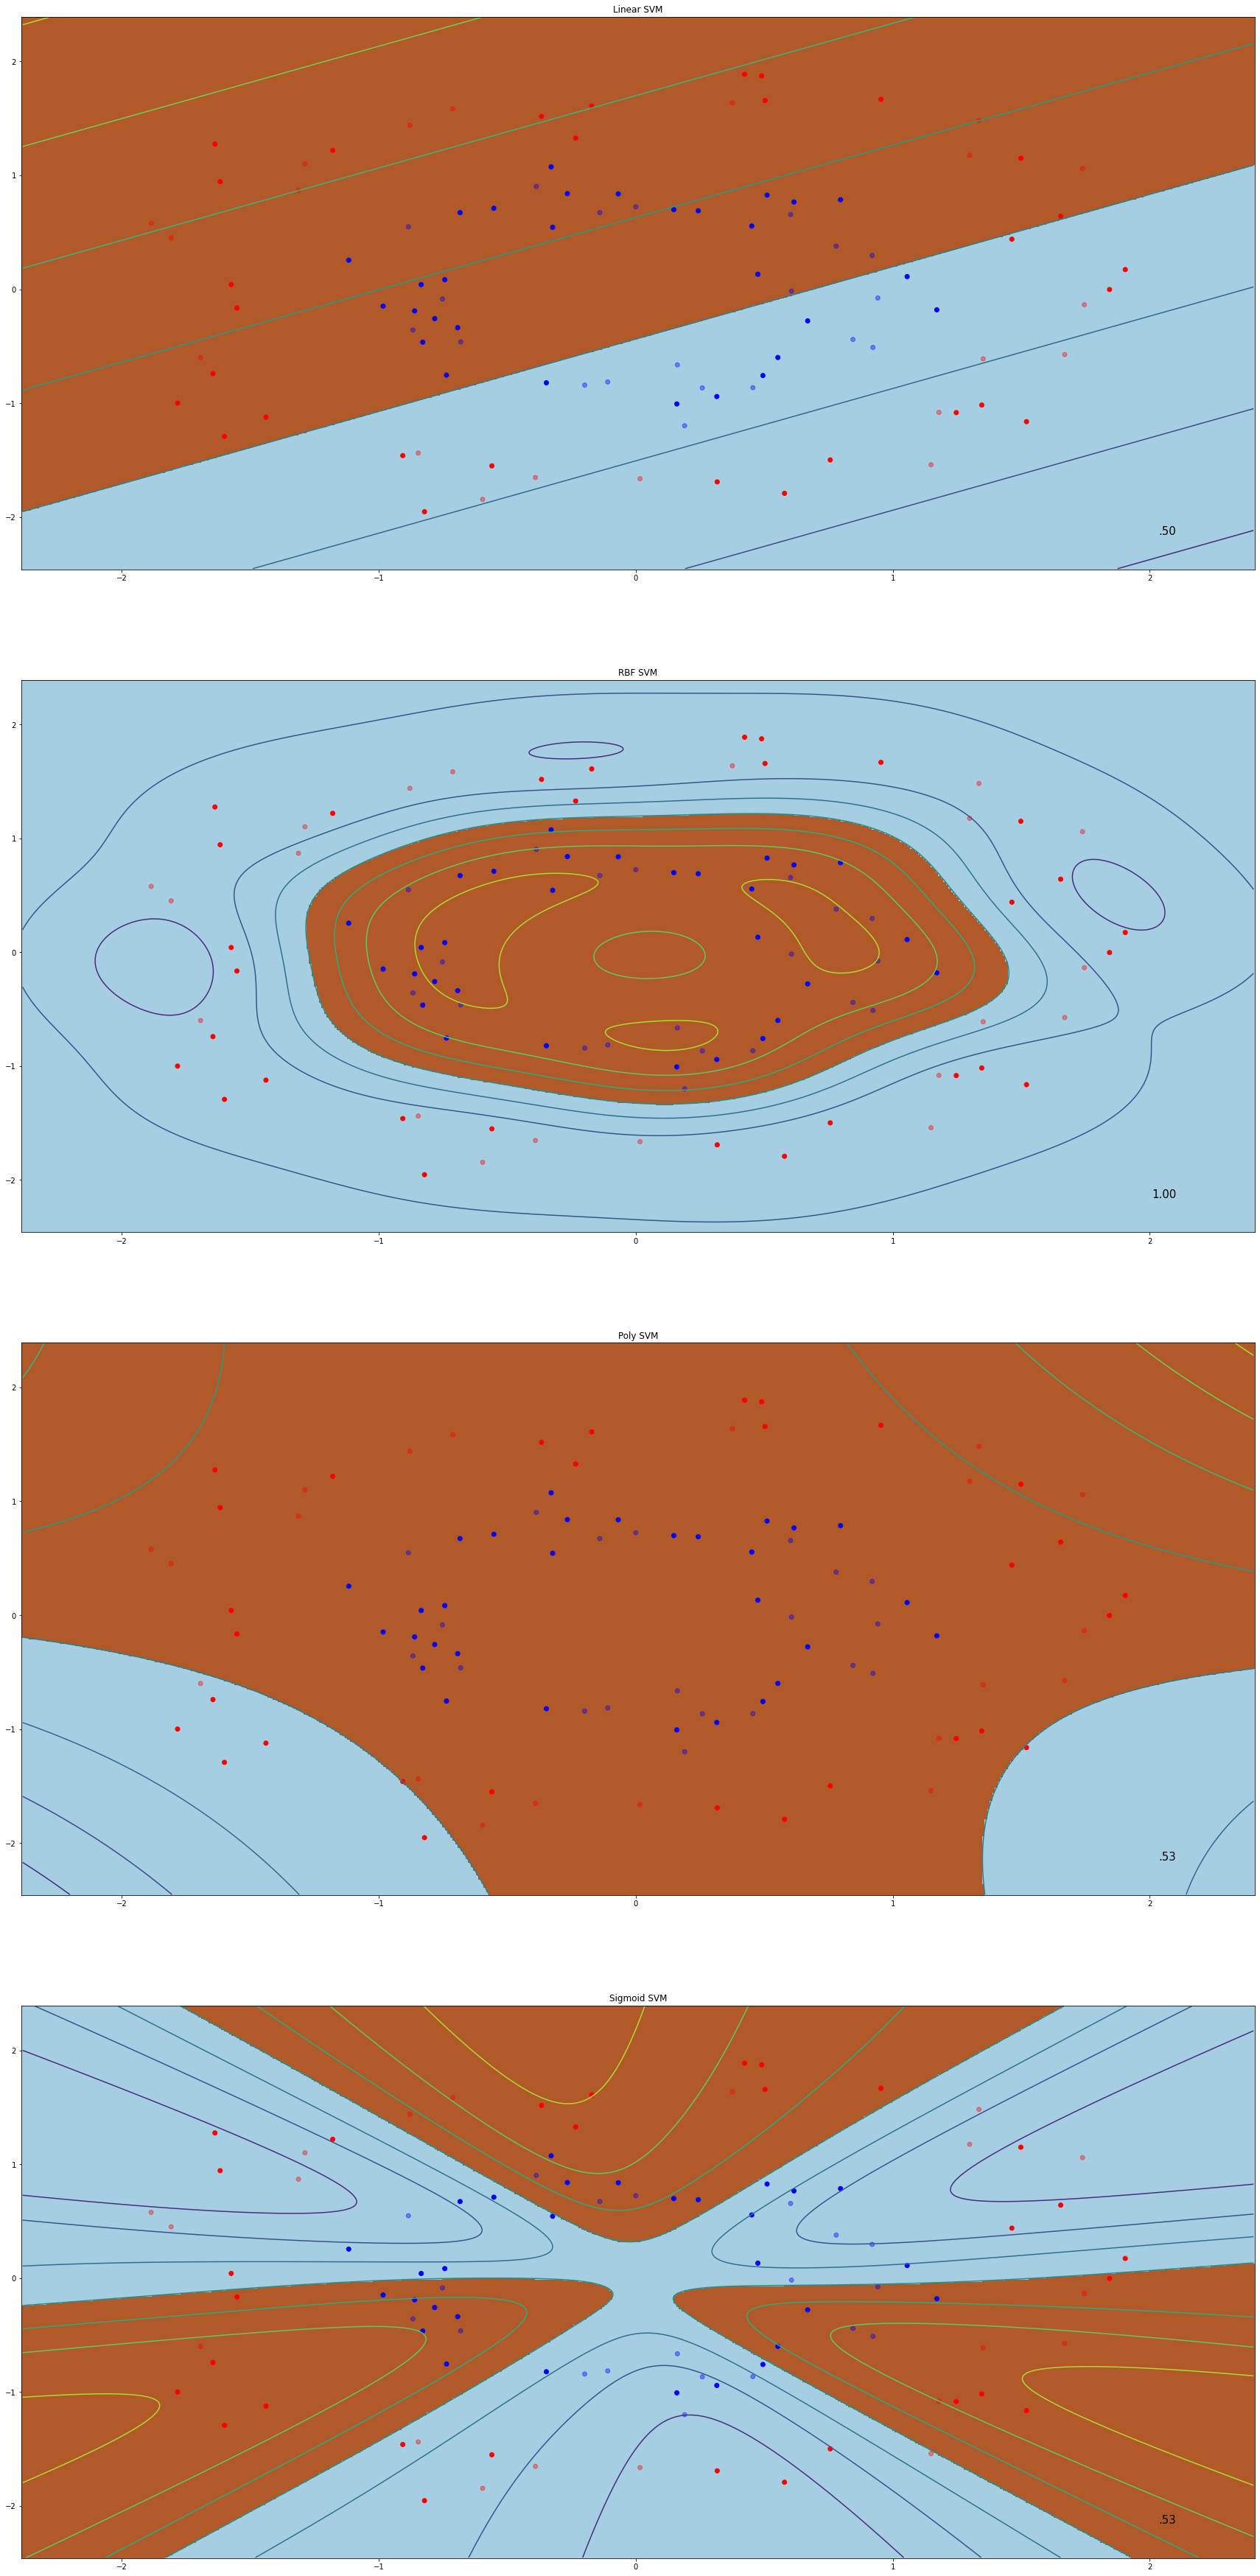

In [139]:
X_con_circles, y_con_circles = make_circles(n_samples=100, noise=0.1, factor=0.5, random_state=1)

concentric_circles = (X_con_circles, y_con_circles)
plt.scatter(X_con_circles[:, 0], X_con_circles[:, 1], c=y_con_circles)
plt.title('Concentric circles data');


datasets = [semi_circle_moons]
h = .01

names = ["Linear SVM", "RBF SVM", "Poly SVM", "Sigmoid SVM"]

classifiers = [
    
    SVC(kernel="linear",  C=0.025),
    SVC(kernel='rbf',     gamma=2, C=1),
    SVC(kernel="poly",    C=0.025),
    SVC(kernel="sigmoid", gamma=2)]


figure = plt.figure(figsize=(30, 80))
i = 1

# iterate over datasets

    # preprocess dataset, split into training and test part
X, y = concentric_circles
    
X = StandardScaler().fit_transform(X)
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))


    # just plot the dataset first
#     cm        = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    
# ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    
    # Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=90, cmap=cm_bright)
    
    # and testing points
plt.scatter(X_test[:, 0],  X_test[:, 1],  c=y_test,  s=90, cmap=cm_bright, alpha=0.3)
    
# plt.set_xlim(xx.min(), xx.max())
# plt.set_ylim(yy.min(), yy.max())
# plt.set_xticks(())
# plt.set_yticks(())
    


    # iterate over classifiers
for name, clf in zip(names, classifiers):
        
    ax = plt.subplot( len(classifiers) + 1,1, i)
        
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, m_max]x[y_min, y_max].
        
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        
        
#         if hasattr(clf, "decision_function"):
#             Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
#         else:
#             Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
    Z = Z.reshape(xx.shape)
        
    plt.pcolormesh(xx, yy, Z > 0, cmap=plt.cm.Paired, shading='auto')
    
    plt.contour(xx, 
                    yy, 
                    Z
#                     colors=['k', 'k', 'k'], 
#                     linestyles=['--', '-.', '--'],
                    #levels=[-.5, 0, .5]
                   )
        
        #ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        
        # and testing points
    ax.scatter(X_test[:, 0],  X_test[:, 1],  c=y_test,  cmap=cm_bright, alpha=0.4)

# plt.set_xlim(xx.min(), xx.max())
# plt.set_ylim(yy.min(), yy.max())
# plt.set_xticks(())
# plt.set_yticks(())
    ax.set_title(name)
        
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
    i += 1


In [141]:
f

NameError: name 'svm' is not defined